In [143]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
file_path = './telco.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [144]:
df = df.drop("ID",axis=1)
originaldf = df.copy()
dummy_cols = ["churn",'region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

df = pd.get_dummies(df,
               columns=dummy_cols,
               prefix=dummy_cols,
               drop_first=True,dtype='int')

df.head()

,tenure,age,address,income,churn_Yes,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,9,64,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,11,33,7,136,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1
2,68,52,24,116,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,33,33,12,33,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,23,30,9,30,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


<Axes: >

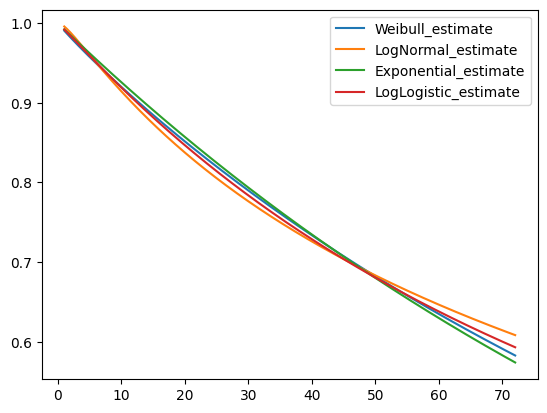

In [145]:
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter


weibull_aft = WeibullFitter()
lognormal_aft = LogNormalFitter()
exponential_aft = ExponentialFitter()
loglogistic_aft = LogLogisticFitter()

weibull_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
lognormal_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
exponential_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
loglogistic_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)

In [146]:


weibull_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for Weibull Fitter is {weibull_aft.AIC_}")
print(f"BIC for Weibull Fitter is {weibull_aft.BIC_}")

lognormal_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for lognormal Fitter is {lognormal_aft.AIC_}")
print(f"BIC for lognormal Fitter is {lognormal_aft.BIC_}")

exponential_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for exponential Fitter is {exponential_aft.AIC_}")
print(f"BIC for exponential Fitter is {exponential_aft.BIC_}")

loglogistic_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for loglogistic Fitter is {loglogistic_aft.AIC_}")
print(f"BIC for loglogistic Fitter is {loglogistic_aft.BIC_}")




AIC for Weibull Fitter is 3216.8611706815464
BIC for Weibull Fitter is 3226.676681239511
AIC for lognormal Fitter is 3209.0351474316735
BIC for lognormal Fitter is 3218.850657989638
AIC for exponential Fitter is 3215.9608134637247
BIC for exponential Fitter is 3220.868568742707
AIC for loglogistic Fitter is 3214.4154757933375
BIC for loglogistic Fitter is 3224.230986351302


We pick lognormal Fitter

In [147]:
from lifelines import LogNormalAFTFitter

best = LogNormalAFTFitter()
best.fit(df, duration_col='tenure', event_col='churn_Yes')
best.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-29 08:01:53 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005  

In [148]:
df = df[["tenure", "churn_Yes", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]
best = LogNormalAFTFitter()
best.fit(df, duration_col='tenure', event_col='churn_Yes')
best.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-29 08:01:53 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

## CLV's

In [149]:
pred = best.predict_survival_function(df)

monthly_margin = 1000 
pred = pred*monthly_margin
drate  = 0.2

pred = pd.DataFrame({c: [pred.iloc[r, c] / ((1 + drate)**(r)) for r in range(72)] for c in range(len(pred.columns))})

In [150]:
df["CLV"] = list(pred.iloc[71])
originaldf["CLV"] = list(pred.iloc[71])

In [151]:
originaldf

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,0.001383
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,0.001424
2,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,0.002236
3,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,0.000871
4,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,0.001592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No,0.000681
996,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No,0.000622
997,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No,0.002043
998,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No,0.001703


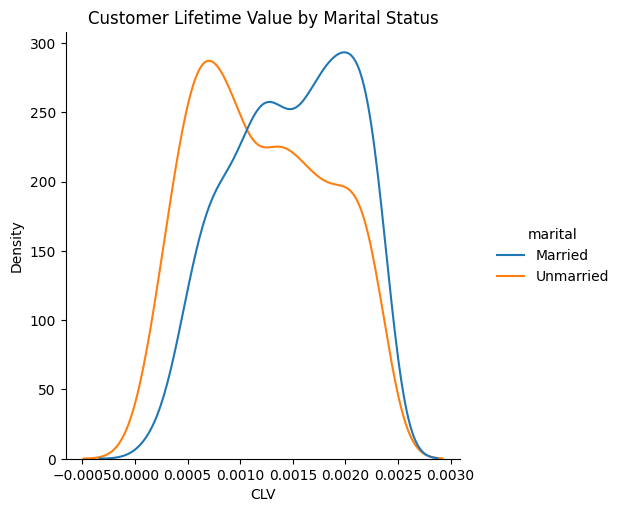

In [152]:
martial = sns.displot(originaldf, x = 'CLV', kind = 'kde', hue = 'marital')
martial.set(title='Customer Lifetime Value by Marital Status')


We can observe slight difference in between married and unmarried users.<br/>
In this case, it seems like married people have higher CLV than unmarried people, meaning that they are not likely to take the rist of leaving the company. In this case it make sense to interpret this way.
Also both of them have different peak positions further confirming the observation

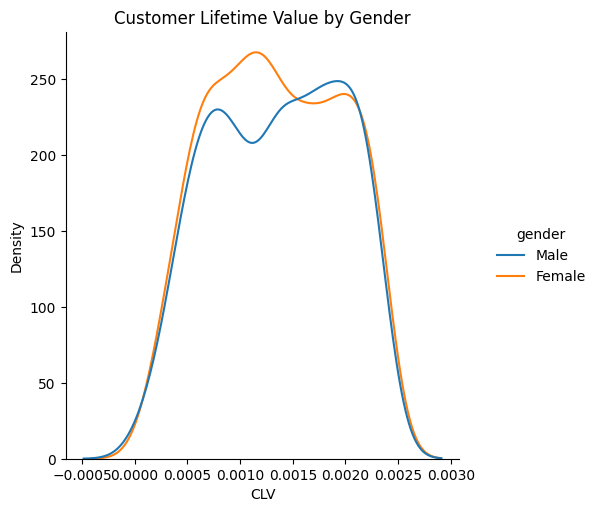

In [153]:
gender = sns.displot(originaldf, x = 'CLV', kind = 'kde', hue = 'gender')
gender.set(title='Customer Lifetime Value by Gender')

Based on the graph, we can see the gender has visually low significance. We can observe a clearer peak for female customers. This implied that gender may not be the singificant factor to differenciate the groups either

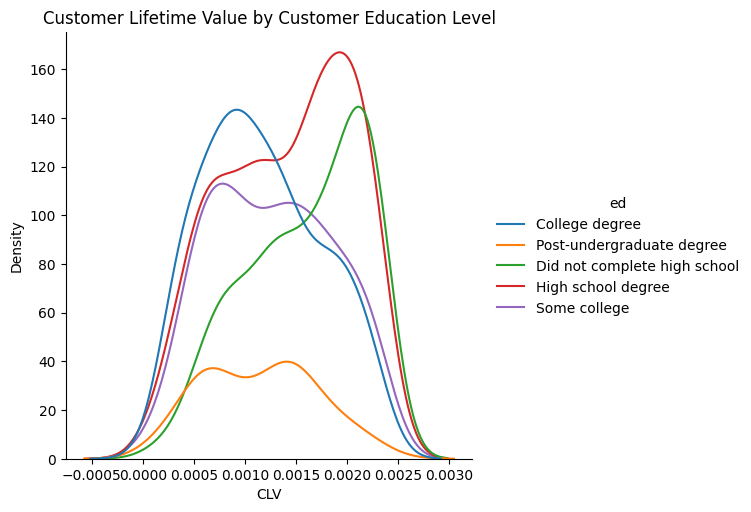

In [154]:
education = sns.displot(originaldf, x = 'CLV', kind = 'kde', hue = 'ed')
education.set(title="Customer Lifetime Value by Customer Education Level")

This plot indicates an interesting correlation. Firstly, the post-undergraduate degreee holders initated low density across the CLVs. Next is the customers that went to some college, where the density is the 2nd lowest. Their values for CLV is comparatevely low and the peak is also on the low side. <br/>
Next are the customers that didn't complete high school. These customers have significantly higher CLV and density is concentrated on high CLV as well. Next is the College degree, which distribution is simillar to customer that went to some college, however the peak and the density is higher. <br/>
Finally, the last is high-school, which are the biggest group of them all. The peak is also very high and they experience higher CLV as well

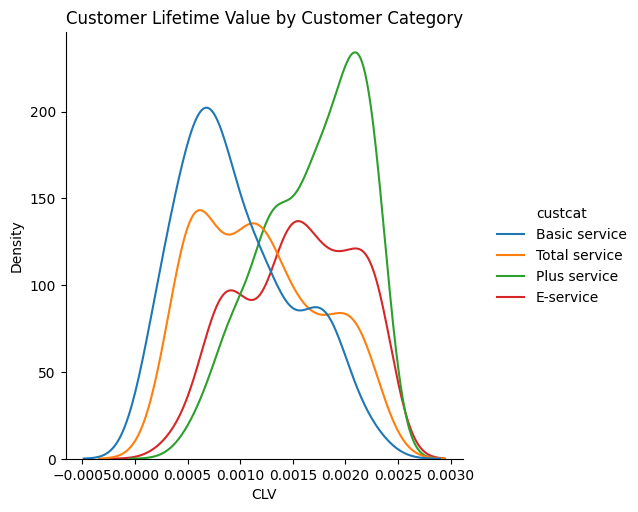

In [155]:
custcat = sns.displot(originaldf, x = 'CLV', kind = 'kde', hue = 'custcat')
custcat.set(title='Customer Lifetime Value by Customer Category')

This plot showcases CLV density for customer categories. From low to high we have <br/>
The lowest density and ClV is the customer utilizing the 'Total' service. It has several peaks. <br/>
The E-service has similar low density but higher CLV. It also has several peaks. <br/>
The next which has low CLV but high density is Basic service. <br/>
the Plus service has the highest density peak and the highest CLV. <br/>
This differenciashion shows clear correlation between customer categories and their CLV-density plot.

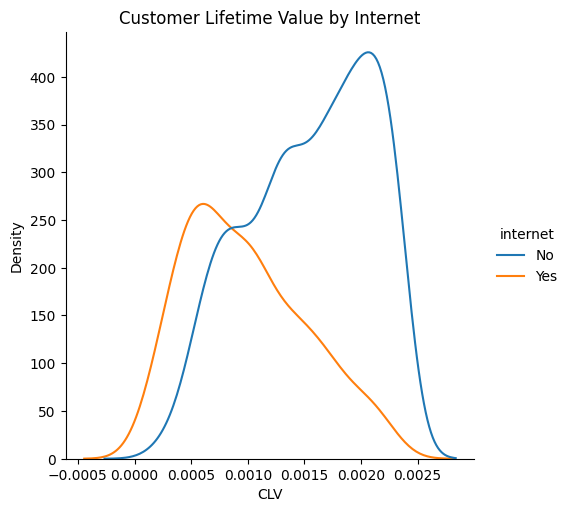

In [156]:
internet = sns.displot(originaldf, x='CLV', kind='kde', hue='internet')
internet.set(title='Customer Lifetime Value by Internet')

Last but not least are the customers having internet connection plot.
In this plot those customer who have interent have low CLV and density, However, those who do not have interent, have high CLV and density.